<a href="https://colab.research.google.com/github/davidc-91/Final-Year-Project/blob/main/Arima_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DateTime
05/08/2021 00:00         NaN
06/08/2021 00:00    0.775963
07/08/2021 00:00    0.315676
15/09/2021 00:00   -0.211842
16/09/2021 00:00   -0.023545
Name: PCT, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


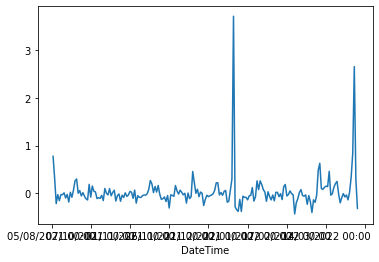

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

series = read_csv('PP Test.csv', header=0, index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

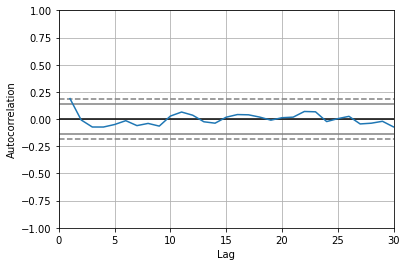

In [ ]:
from pandas import read_csv
from matplotlib import pyplot 
from pandas.plotting import autocorrelation_plot
series = read_csv('PP Test.csv', header=0, index_col=0)
series.iloc[0] = 0 
ax = autocorrelation_plot(series)
ax.set_xlim([0, 30])
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_

                               SARIMAX Results                                
Dep. Variable:                    PCT   No. Observations:                  196
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -100.132
Date:                Thu, 26 May 2022   AIC                            212.264
Time:                        23:50:45   BIC                            231.902
Sample:                             0   HQIC                           220.216
                                - 196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6422      0.024    -26.758      0.000      -0.689      -0.595
ar.L2         -0.5546      0.050    -11.006      0.000      -0.653      -0.456
ar.L3         -0.4756      0.065     -7.314      0.0

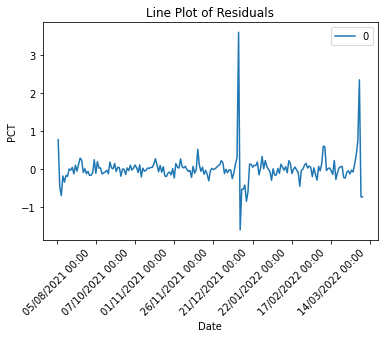

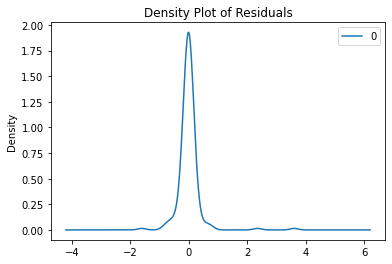

                0
count  195.000000
mean     0.003901
std      0.393659
min     -1.602104
25%     -0.108867
50%     -0.001937
75%      0.073827
max      3.605374


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('PP Test.csv', header=0, index_col=0, squeeze=True)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot(rot=45)
pyplot.title('Line Plot of Residuals')
pyplot.xlabel('Date')
pyplot.ylabel('PCT')
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.title('Density Plot of Residuals')
pyplot.ylabel('Density')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=-0.019313, expected=-0.158264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=-0.069053, expected=-0.069746
predicted=-0.072831, expected=0.263945
predicted=0.051370, expected=0.079584
predicted=0.044616, expected=0.264033
predicted=0.108100, expected=0.187322
predicted=0.097214, expected=0.079492
predicted=0.107445, expected=0.029823
predicted=0.136400, expected=-0.164140
predicted=0.038492, expected=0.035723
predicted=0.074020, expected=-0.063101
predicted=0.023829, expected=-0.133597
predicted=-0.047319, expected=-0.031698
predicted=-0.047333, expected=-0.153628
predicted=-0.098013, expected=0.023918
predicted=-0.039254, expected=0.023921
predicted=-0.037235, expected=-0.066030
predicted=-0.063057, expected=-0.004667
predicted=-0.033125, expected=-0.127321
predicted=-0.067869, expected=0.142418
predicted=0.019354, expected=0.187214
predicted=0.061084, expected=-0.051962
predicted=-0.001180, expected=-0.022297
predicted=0.002830, expected=0.052886
predicted=0.024619, expected=-0.001612
predicted=0.052100, expected=-0.026649
predicted=0.023984, expect

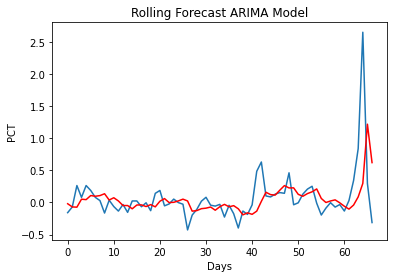

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('PP Test.csv', header=0, index_col=0, squeeze=True)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Rolling Forecast ARIMA Model')
pyplot.xlabel('Days')
pyplot.ylabel('PCT')
pyplot.show()